In [47]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader as DataLoader
from torch.autograd import Variable

from ipywidgets import IntProgress

In [48]:
# download datasets
train_dataset = datasets.MNIST(root = "./data/",
                            transform=transforms.ToTensor(),
                            train = True,
                            download = True)

In [49]:
print(len(train_dataset)) # 60000 differebt digits in this data set
print(train_dataset[0])
print(type(train_dataset[0])) #| tuple

60000
(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 

In [50]:
# Input Matrix
train_dataset[0][0].size() # 28x28

torch.Size([1, 28, 28])

In [51]:
# Label
train_dataset[0][1]

5

### Displaying MINIST

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [53]:
# train_dataset[0][0] is a tensor, use numpy() turn type.
train_dataset[0][0].numpy().shape # (1, 28, 28)

(1, 28, 28)

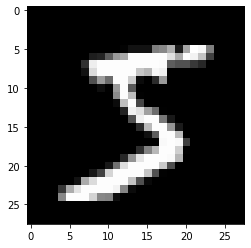

In [54]:
# reshape to (28, 28) for displaying
show_image = train_dataset[0][0].numpy().reshape(28, 28)
# show
plt.imshow(show_image, cmap='gray')

Label: 0


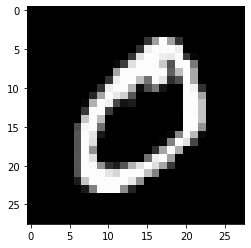

In [55]:
print('Label:', train_dataset[1][1]) # 
plt.imshow(train_dataset[1][0].numpy().reshape(28, 28), cmap='gray')

### Loading MNIST Test Dataset
* We wanto to evaluate our models performance.
* Out-of-sample.

In [56]:
test_dataset = datasets.MNIST(root='./data', 
                              train=False,
                               transform=transforms.ToTensor())

In [57]:
print(len(test_dataset))
print(type(test_dataset[0]))

10000
<class 'tuple'>


In [58]:
# Matrix
test_dataset[0][0].size()

torch.Size([1, 28, 28])

Label: 2


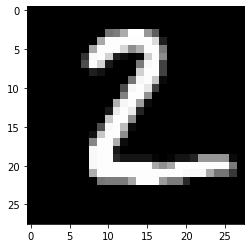

In [59]:
print('Label:', test_dataset[1][1]) # 
plt.imshow(test_dataset[1][0].numpy().reshape(28, 28), cmap='gray')

### Make Dataset Iterable
* total data: 60000
* mini batch: 100 , Number of examples in 1 iteration.
* iterations: 3000, One mini-batch forward and backward pass.
* epoch:
    * 1 epoch: running through the whole dataset once.
    * $ epochs = iterations \div \frac{total data}{mini batch} = 3000\div \frac{60000}{100} = 5 $

In [60]:
batch_size = 100
iteration_n = 3000

In [61]:
epoch_n = int(iteration_n/ (len(train_dataset)/batch_size))
epoch_n

5

In [62]:
# create iterable object: Training dataset and testing dataset
train_loader = DataLoader(dataset=train_dataset,
                           batch_size=batch_size,
                           shuffle=True)
test_loader = DataLoader(dataset=test_dataset,
                           batch_size=batch_size,
                           shuffle=True)

In [63]:
# check iterability
import collections
isinstance(train_loader, collections.Iterable) and isinstance(test_loader, collections.Iterable)

True

### Buildgin Model

In [64]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        out = self.linear(x)
        return out

### Instantiate Model Class
* Input dimension: Size of Image (28 x 28 = 784).
* Output dimension: 10 labels (0, 1, 2, 3, 4, 5, 6, 7, 9)

In [65]:
input_dim = 28 * 28
output_dim = 10
logisticRegressionModel = LogisticRegressionModel(input_dim, output_dim)

### Instantiate Loss Class
* Logistic Regression: Cross Entropy Loss.
* Linear Regression: MSE.

#### nn.CrossEntropyLoss()
1. Computes softmax (logistic/softmax function) and cross entropy.

In [66]:
criterion = nn.CrossEntropyLoss()

#### Instantiate Optimizer Class
* Equation: 
    $$ \theta = \theta - \eta \cdot \nabla_{ \theta} $$

Where $\theta$ is parameters; $\eta$ is learning rate; $\theta$ is parameter's gradients.


Even simplier equation:
- parameters = parameters - learning_rate * parameters_gradients
- At every iteration, we update our model's parameters.

In [67]:
learning_rate = 0.001
optimizer = torch.optim.SGD(logisticRegressionModel.parameters(), lr=learning_rate)

In [68]:
print(logisticRegressionModel.parameters())
print(len(list(logisticRegressionModel.parameters())))

# FC 1 Parameters
print( list(logisticRegressionModel.parameters())[0].size(),
       list(logisticRegressionModel.parameters())[1].size() )

<generator object Module.parameters at 0x12e9c28d0>
2
torch.Size([10, 784]) torch.Size([10])


#### Dot Poduct Review 
1. Example 1:
    * $ A:(100, 10) $ 
    * $ B:(10, 1)$
    * $ A \cdot B = (100, 10) \cdot (10, 1) = (100, 1) $
2. Example 2:
    * $ A:(10, 5) $ 
    * $ B:(5, 2)$
    * $ A \cdot B = (10, 5) \cdot (5, 2) = (10, 2) $

### Train Model
1. Convert Inputs/Labels to Variables
2. Clear gradient buffers
3. Get Output given inputs
4. Get Loss
5. Get gradients w.r.t parameters
6. Update parameters using gradients
7. Repeat

In [69]:
iter = 0
for epoch in range(epoch_n):
    for i, (images, labels) in enumerate(train_loader):
        # load images as Variable
        images = Variable(images.view(-1, 28*28))  # resize
        labels = Variable(labels)
        
        # clear gradients w.r.t parameters
        optimizer.zero_grad()
        
        # forward pass to get output
        outputs = logisticRegressionModel(images)
        
        # calculate loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # getting gradients w.r.t. parameters
        loss.backward()
        
        # update parameters
        optimizer.step()
        
        iter += 1
        if iter % 500 == 0:
            # calculate accuracy
            correct = 0
            total = 0
            
            # iterate through test dataset
            for images, labels in test_loader:
                # load test images to a Torch Variable
                images = Variable(images.view(-1, 28*28)) # resize
                
                # forward pass only to get output
                outputs = logisticRegressionModel(images)
                
                # get predication from maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # total number of labels
                total += labels.size(0)
                
                # total correct predictions
                correct += (predicted == labels).sum()
                
            accuracy = 100 * correct // total
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.data, accuracy))

Iteration: 500. Loss: 1.8854564428329468. Accuracy: 65
Iteration: 1000. Loss: 1.5685104131698608. Accuracy: 74
Iteration: 1500. Loss: 1.3917014598846436. Accuracy: 77
Iteration: 2000. Loss: 1.2284493446350098. Accuracy: 80
Iteration: 2500. Loss: 0.9935594797134399. Accuracy: 81
Iteration: 3000. Loss: 1.0184414386749268. Accuracy: 82
